In [1]:
#Importing the data from file
import pandas as pd
raw = pd.read_pickle("linear_one_co.pkl")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting matplotlib parameters
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [3]:
#Cutting the data
df2 = raw[raw['Spend_inf']<=1000]

In [4]:
#Importing scalar models
import pickle
min_max = pickle.load(open('min_max.sav', 'rb'))
y_norm = min_max.fit_transform(df2[['Spend_inf']])

In [5]:
from prince import MCA

In [6]:
mca = MCA(n_components = -1, n_iter = 100, random_state = 101, copy=True)

In [7]:
features = df2.drop(['Spend_inf'], axis=1)

In [8]:
mca.fit(features)
feat_mca = mca.transform(features)
feat_mca.head()

0         1         2         3         4         5         6  \
0  0.593037 -0.491645 -0.588023 -0.377441  0.438959 -0.385989  0.108008   
1  0.491577 -0.954631 -0.157009 -0.511198  0.927224 -0.377631  0.311037   
2  0.319406 -0.348517 -0.249282 -0.799763  0.753288 -0.645207 -0.005506   
3  0.262521 -0.994743 -0.547863 -1.069307  0.281353 -0.206912 -0.108962   
4  1.185074 -0.908536  0.435379 -0.557448  0.602819 -0.305292  0.315233   

          7  
0  0.367368  
1  0.163478  
2  0.393503  
3  0.381456  
4  0.205605

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [10]:
#Scaling the mca data
feat_mca_norm = min_max_scaler.fit_transform(feat_mca)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(feat_mca_norm, y_norm, test_size=0.33)

In [13]:
#Creating linear regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [15]:
y_predr = regr.predict(X_test)
print('r2 socre is ',r2_score(y_test,y_predr))
print('mean_sqrd_error is==',mean_squared_error(y_test,y_predr))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_predr)))

r2 socre is  0.10997174902149554
mean_sqrd_error is== 0.05823164735556887
root_mean_squared error of is== 0.24131234397678225


In [16]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svr_model = svm.SVR()

#Train the model using the training sets
svr_model.fit(X_train, y_train)

#Predict the response for test dataset
y_preds = svr_model.predict(X_test)

print('r2 socre is ',r2_score(y_test,y_preds))
print('mean_sqrd_error is==',mean_squared_error(y_test,y_preds))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_preds)))

r2 socre is  0.24403499898506154
mean_sqrd_error is== 0.04946032589848357
root_mean_squared error of is== 0.2223967758275366


In [17]:
from sklearn.tree import DecisionTreeRegressor
# Create Decision Tree classifer object
model_tree = DecisionTreeRegressor(random_state=42)

# Train Decision Tree Classifer
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
y_preddt = model_tree.predict(X_test)
print('r2 socre is ',r2_score(y_test,y_preddt))
print('mean_sqrd_error is==',mean_squared_error(y_test,y_preddt))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_preddt)))

r2 socre is  0.11359864767281214
mean_sqrd_error is== 0.057994351198929275
root_mean_squared error of is== 0.24082016360539513


In [19]:
import numpy as np
from sklearn.metrics import mean_absolute_error

In [20]:
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

Text(0, 0.5, 'total impurity of leaves')

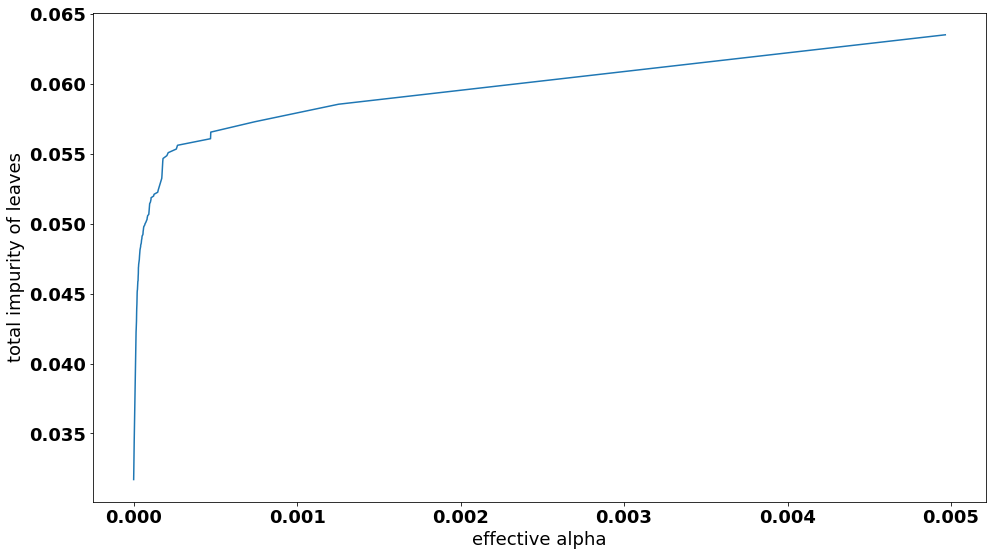

In [21]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [22]:
clfs = []
i = 1
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    i=i+1

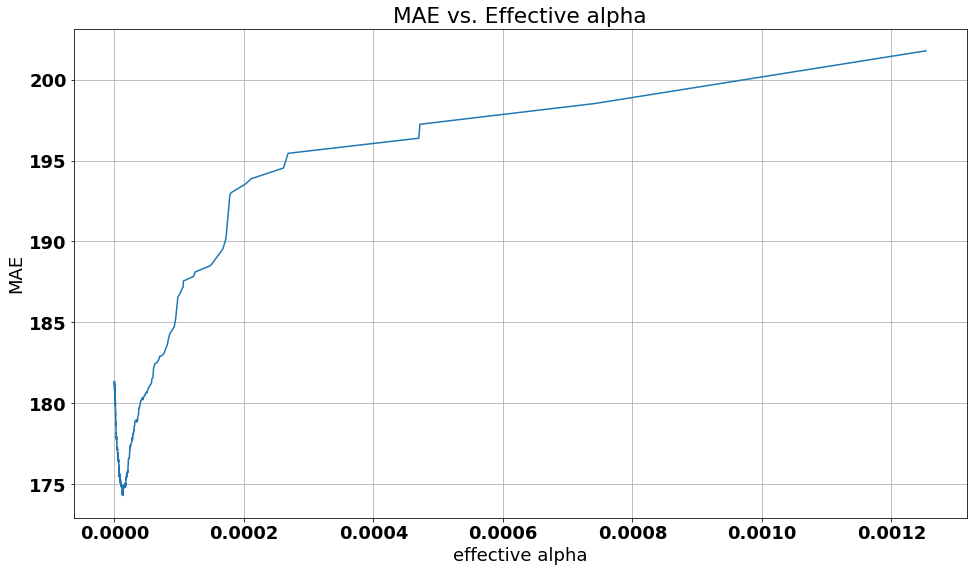

In [23]:
acc_scores = [min_max.inverse_transform(np.array(mean_absolute_error(y_test, clf.predict(X_test))).reshape(-1,1))[0][0] for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.title("MAE vs. Effective alpha")
plt.xlabel("effective alpha")
plt.ylabel("MAE")
plt.savefig("MAEvsAlpha_MCA_CO.png",bbox_inches='tight')
plt.show()

In [24]:
model_tree_better = clfs[np.array(acc_scores).argmin()]

In [25]:
y_preddt = model_tree_better.predict(X_test)
print('r2 socre is ',r2_score(y_test,y_preddt))
print('mean_sqrd_error is==',mean_squared_error(y_test,y_preddt))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_preddt)))

r2 socre is  0.22326115126838464
mean_sqrd_error is== 0.05081949104085503
root_mean_squared error of is== 0.2254317879999514


In [26]:
print(min_max.inverse_transform(np.array(mean_absolute_error(y_test, model_tree_better.predict(X_test))).reshape(-1,1)))

[[174.29625405]]


In [27]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer
model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))

# The output neuron
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=-1)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [28]:
min_max.inverse_transform(np.array(mean_absolute_error(y_test, model.predict(X_test))).reshape(-1,1))

array([[173.66659079]])

In [29]:
# Defining a function to find the best parameters for ANN
import numpy as np

def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
#     import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=512, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=-1)

#             SMAPE = calculate_smape(y_test, model.predict(X_test))
            MAE = np.mean(np.abs(y_test-model.predict(X_test)))

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', min_max.inverse_transform(np.array(MAE).reshape(-1,1)))

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), MAE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: [[181.89684527]]
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: [[181.18521338]]
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: [[175.06609806]]
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/1

Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100
Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100

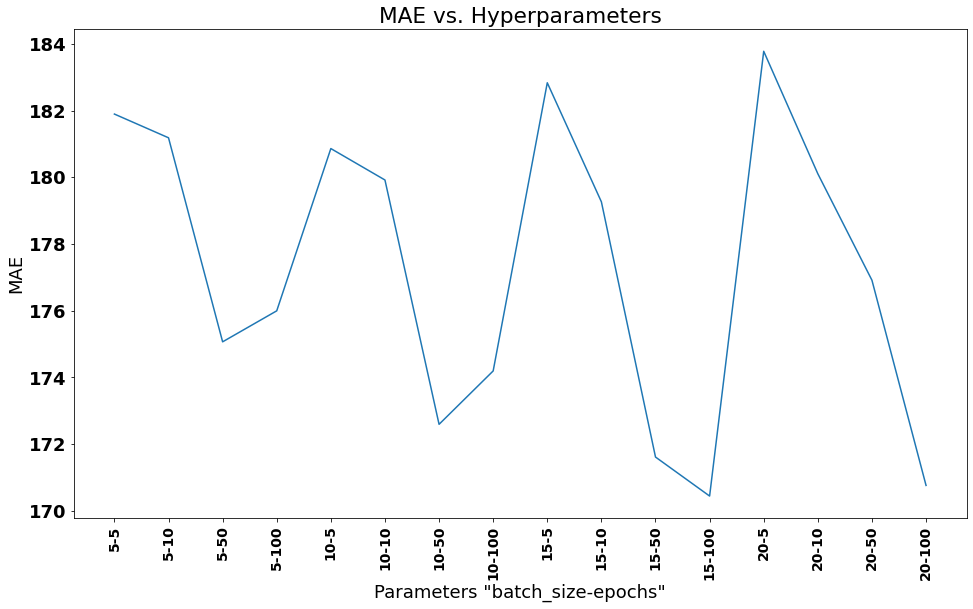

In [30]:
plt.plot([i for i in range(len(ResultsData['Parameters']))], min_max.inverse_transform(np.array(ResultsData['Accuracy']).reshape(-1,1)))
plt.xticks([i for i in range(len(ResultsData['Parameters']))], ResultsData['Parameters'], rotation ='vertical', fontsize=14)
plt.ylabel("MAE")
plt.xlabel('Parameters "batch_size-epochs"')
plt.title('MAE vs. Hyperparameters')
plt.savefig("NN_MCA_C.png",bbox_inches='tight')
plt.show()

In [31]:
model = Sequential()

model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train ,batch_size = 20, epochs = 100, verbose=-1)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [32]:
min_max.inverse_transform(np.array(mean_absolute_error(y_test, model.predict(X_test))).reshape(-1,1))

array([[175.56181903]])

In [33]:
y_prednn = model.predict(X_test)
print('r2 socre is ',r2_score(y_test,y_prednn))
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prednn))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prednn)))

r2 socre is  0.23391584763893958
mean_sqrd_error is== 0.050122388987017194
root_mean_squared error of is== 0.2238803005782715


In [34]:
pickle.dump(mca, open('mca_co.sav', 'wb'))
pickle.dump(min_max_scaler, open('min_max_feat_co.sav', 'wb'))
pickle.dump(regr, open('lregr_mca_co.sav', 'wb'))
pickle.dump(model_tree_better, open('best_tree_mca_co.sav', 'wb'))
pickle.dump(svr_model, open('svr_model_mca_co.sav', 'wb'))